<a href="https://colab.research.google.com/github/knoppin1/DATA-606-Capstone/blob/main/ipynb/203_kmeans_population.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA 606 Capstone 
## Ken Noppinger - Phase 2, Notebook 03
### **Wealth and Population Density Influences on COVID-19 Cases and Vaccinations Using Machine Learning**
#### <u>K-Means on Population and COVID-19 Case Densities: Florida and California Counties</u>

This notebook performs K-Means clustering on the following features:
* Population Per Square Mile 
* COVID-19 Cases Per Square Mile 

K-Means clustering is run for counties in the following states:
* Florida 
* California

The following algorithm is applied to each data set:
- Filter data to counties in subject state
- Scale features using StandardScaler
- Loop to determine optimal clusters using Elbow Method
    - Define K-Means clustering machine learning model
    - Fit the model with the scaled features
    - Plot the WCSS (within cluster sum of squares) to show the elbow
- Define the K-Means model for the optimal K (i.e., number of clusters)  
- Fit and predict cluster labels using the scaled features
- Scatter plot the resulting clusters  

Note: The "all_data.pkl" pickle file is loaded for use in this workbook and represents the consolidated data for the study from Phase I work.

--------------------

## Set Up

In [ ]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from collections import Counter

Load Dataframe from Pickle file

In [ ]:
# Read from pickle file
df = pd.read_pickle("./all_data_fips.pkl")
df.shape

(3112, 17)

In [ ]:
# Verify data loaded.
df.head(3)

,FIPS,FIPS_Code,County,State_Abbr,State,Place,Land_Area,Population,Pop_Sq_Mile,Income,Confirmed,Cases_Sq_Mile,Deaths,Deaths_Sq_Mile,Vaccinated,Vax_Pct,Vax_Sq_Mile
0,2013,02013,Aleutians East Borough,AK,Alaska,"Aleutians East, Alaska, US",6981.94,3337,0,62537,369,0,3,0,2172,65.1,0
1,2016,02016,Aleutians West Census Area,AK,Alaska,"Aleutians West, Alaska, US",4390.28,5634,1,58008,721,0,1,0,2656,47.1,0
2,2020,02020,Anchorage Municipality,AK,Alaska,"Anchorage, Alaska, US",1704.68,288000,168,70145,31058,18,179,0,126221,43.8,74


In [ ]:
# Review statistics
df.describe()

,FIPS,Land_Area,Population,Pop_Sq_Mile,Income,Confirmed,Cases_Sq_Mile,Deaths,Deaths_Sq_Mile,Vaccinated,Vax_Pct,Vax_Sq_Mile
count,3112.000000,3112.000000,3.112000e+03,3112.000000,3112.000000,3.112000e+03,3112.000000,3112.000000,3112.000000,3.112000e+03,3112.000000,3112.000000
mean,30282.262211,1106.374479,1.049407e+05,270.714332,45955.784062,1.061510e+04,26.421594,190.291774,0.430591,4.015677e+04,30.457584,105.849936
std,15126.815912,3610.275409,3.347700e+05,1782.779788,13144.549879,3.754849e+04,175.938025,727.551874,5.704471,1.501343e+05,15.123688,951.683493
min,1001.000000,2.000000,1.690000e+02,0.000000,19472.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,18170.500000,430.567500,1.094850e+04,16.750000,37962.000000,1.085000e+03,1.000000,20.000000,0.000000,2.198250e+03,23.500000,2.000000
50%,29160.000000,612.290000,2.607000e+04,45.000000,43431.500000,2.639000e+03,4.000000,51.000000,0.000000,6.654000e+03,31.700000,11.000000
75%,45049.500000,917.662500,6.831300e+04,118.250000,50732.750000,6.800000e+03,12.000000,121.000000,0.000000,2.162975e+04,40.500000,35.000000
max,56045.000000,145504.790000,1.003911e+07,71340.000000,229825.000000,1.247909e+06,6065.000000,24459.000000,197.000000,4.922209e+06,99.900000,42855.000000


## Florida

### Filter State/County Data

In [ ]:
florida_df = df.query("`State` == 'Florida'")
florida_df.shape

(67, 17)

Reference: https://www.thiscodeworks.com/use-sklearn-standardscaler-only-on-certain-feature-columns-python/605cc55c3c8db10014203c0e

### Scale Feature Data

In [ ]:
scaled_features = florida_df.copy()
 
col_names = ['Pop_Sq_Mile','Cases_Sq_Mile']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
 
scaled_features[col_names] = features
scaled_features[['Pop_Sq_Mile','Cases_Sq_Mile']]

,Pop_Sq_Mile,Cases_Sq_Mile
317,-0.133347,-0.148195
318,-0.583988,-0.537240
319,-0.267841,-0.182025
320,-0.503642,-0.469580
321,0.364455,0.071699
...,...,...
379,-0.561282,-0.520325
380,0.207255,0.054784
381,-0.573508,-0.554155
382,-0.545562,-0.520325


### Determine Optimal Clusters (Elbow Method)

In [ ]:
X = scaled_features[['Pop_Sq_Mile','Cases_Sq_Mile']]
#X = florida_df[['Pop_Sq_Mile','Cases_Sq_Mile']]

Reference: https://medium.com/pursuitnotes/k-means-clustering-model-in-6-steps-with-python-35b532cfa8ad

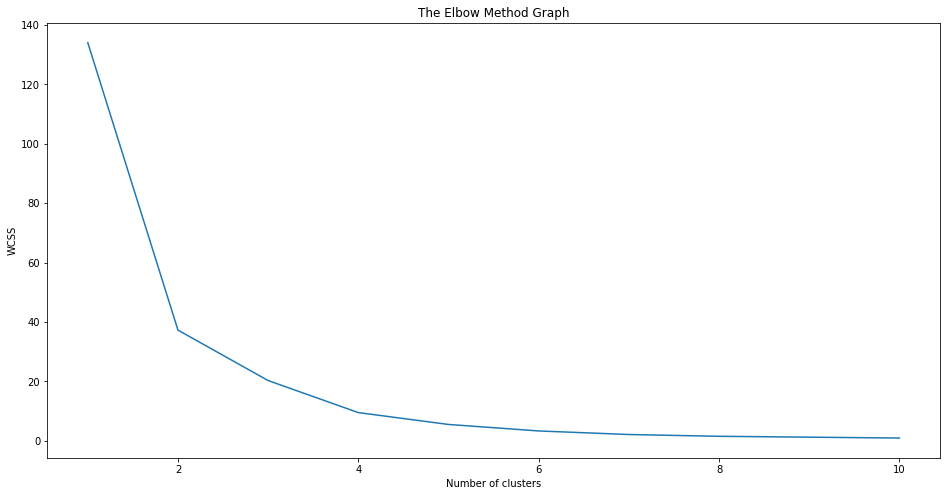

In [ ]:
# Using the elbow method to find out the optimal number of clusters. 
wcss=[]

# Loop ten times to:
#  - fit the k-means algorithm to data 
#  - use kmean++ random initialization method 
#  - allow for a maximum of 300 iterations to find final clusters 
#  - run the algorithm for 10 different initial centroids 
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10, random_state=0)
    kmeans.fit(X)

    # Compute the WCSS (within cluster sum of squares) and append it to a WCSS list.
    wcss.append(kmeans.inertia_)

# Plot the elbow graph using the WCSS list.
fig= plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

***Four (4) clusters seems to be the optimum number of clusters because that is where the elbow curves***

### Run Optimal K-Means

Create and fit the optimal K-Means cluster model

In [ ]:
kmeans = KMeans(n_clusters=4, init ='k-means++', max_iter=300, n_init=10, random_state=0 )
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
# The number of iterations required to converge
kmeans.n_iter_

5

Fit and predict the cluster labels

In [ ]:
labels = kmeans.fit_predict(X)
Counter(labels)

Counter({0: 15, 1: 45, 2: 6, 3: 1})

In [ ]:
X['Label'] = labels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Look at centroids

In [ ]:
kmeans.cluster_centers_

array([[ 0.30879447,  0.21265754],
       [-0.47891639, -0.4684525 ],
       [ 1.89512319,  2.2424557 ],
       [ 5.54858158,  4.43576537]])

In [ ]:
X[X.Label==2][['Pop_Sq_Mile','Cases_Sq_Mile']]

,Pop_Sq_Mile,Cases_Sq_Mile
322,2.149555,2.811927
331,1.524246,1.627878
344,1.849127,1.763198
359,1.829914,3.860656
364,2.023795,2.067668
373,1.994101,1.323408


### Scatter Plot Cluster Results

#### Plot scaled data cluster 

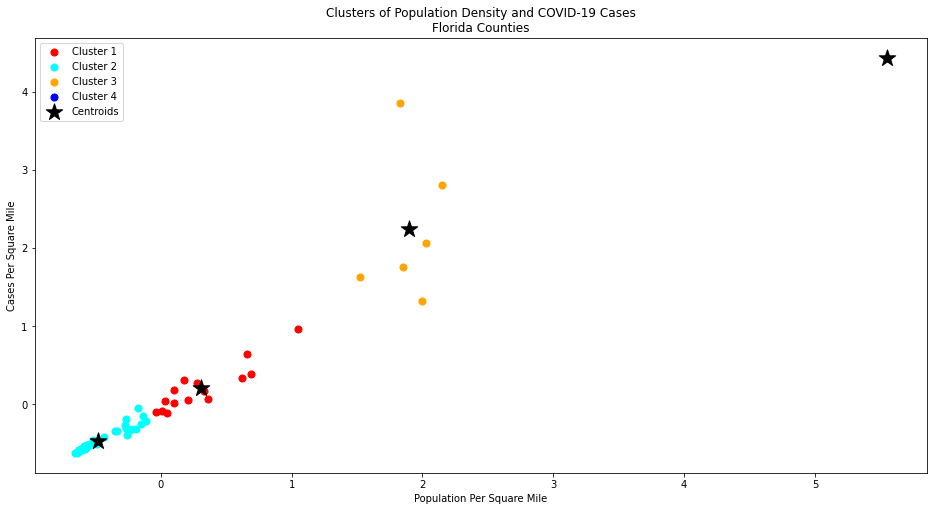

In [ ]:
fig= plt.figure(figsize=(16,8))
plt.scatter(X[X.Label==0]['Pop_Sq_Mile'], X[X.Label==0]['Cases_Sq_Mile'], s=50, c='red', label ='Cluster 1')
plt.scatter(X[X.Label==1]['Pop_Sq_Mile'], X[X.Label==1]['Cases_Sq_Mile'], s=50, c='cyan', label ='Cluster 2')
plt.scatter(X[X.Label==2]['Pop_Sq_Mile'], X[X.Label==2]['Cases_Sq_Mile'], s=50, c='orange', label ='Cluster 3')
plt.scatter(X[X.Label==3]['Pop_Sq_Mile'], X[X.Label==3]['Cases_Sq_Mile'], s=50, c='blue', label ='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', label = 'Centroids', marker='*')
#plt.xlim(0,4000)
#plt.ylim(0,350)
plt.title('Clusters of Population Density and COVID-19 Cases\nFlorida Counties')
plt.xlabel('Population Per Square Mile')
plt.ylabel('Cases Per Square Mile')
plt.legend(loc='upper left')
plt.show()

In [ ]:
florida_df['Label'] = labels
florida_df[['County','Pop_Sq_Mile','Cases_Sq_Mile','Label']].head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,County,Pop_Sq_Mile,Cases_Sq_Mile,Label
317,Alachua County,307,29,1
318,Baker County,49,6,1
319,Bay County,230,27,1


#### Plot clusters on original data scale

Scale back the centroids to original data representation


In [ ]:
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroids

array([[ 560.13333333,   50.33333333],
       [ 109.15555556,   10.06666667],
       [1468.33333333,  170.33333333],
       [3560.        ,  300.        ]])

In [ ]:
X1 = florida_df

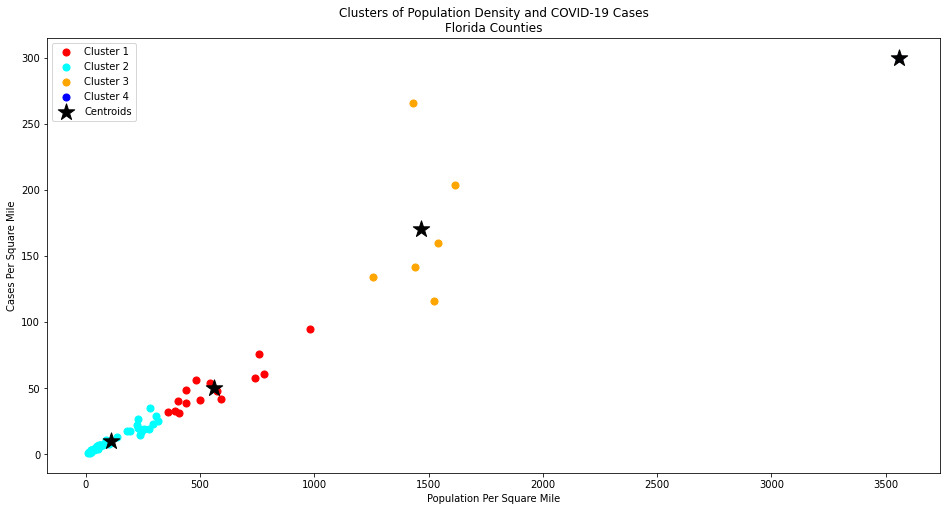

In [ ]:
fig= plt.figure(figsize=(16,8))
plt.scatter(X1[X1.Label==0]['Pop_Sq_Mile'], X1[X1.Label==0]['Cases_Sq_Mile'], s=50, c='red', label ='Cluster 1')
plt.scatter(X1[X1.Label==1]['Pop_Sq_Mile'], X1[X1.Label==1]['Cases_Sq_Mile'], s=50, c='cyan', label ='Cluster 2')
plt.scatter(X1[X1.Label==2]['Pop_Sq_Mile'], X1[X1.Label==2]['Cases_Sq_Mile'], s=50, c='orange', label ='Cluster 3')
plt.scatter(X1[X1.Label==3]['Pop_Sq_Mile'], X1[X1.Label==3]['Cases_Sq_Mile'], s=50, c='blue', label ='Cluster 4')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='black', label = 'Centroids', marker='*')
#plt.xlim(0,4000)
#plt.ylim(0,350)
plt.title('Clusters of Population Density and COVID-19 Cases\nFlorida Counties')
plt.xlabel('Population Per Square Mile')
plt.ylabel('Cases Per Square Mile')
plt.legend(loc='upper left')
plt.show()

-------------------------

## California

### Filter State/County Data

In [ ]:
ca_df = df.query("`State` == 'California'")
ca_df.shape

(58, 17)

Reference: https://www.thiscodeworks.com/use-sklearn-standardscaler-only-on-certain-feature-columns-python/605cc55c3c8db10014203c0e

### Scale Feature Data

In [ ]:
scaled_features = ca_df.copy()
 
col_names = ['Pop_Sq_Mile','Cases_Sq_Mile']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
 
scaled_features[col_names] = features
scaled_features[['Pop_Sq_Mile','Cases_Sq_Mile']]

,Pop_Sq_Mile,Cases_Sq_Mile
184,0.616594,0.650196
185,-0.284806,-0.377061
186,-0.258881,-0.326123
187,-0.232158,-0.317633
188,-0.267257,-0.360082
189,-0.278026,-0.368571
190,0.357342,0.454932
191,-0.274436,-0.368571
192,-0.240534,-0.326123
193,-0.218597,-0.232736


### Determine Optimal Clusters (Elbow Method)

In [ ]:
X = scaled_features[['Pop_Sq_Mile','Cases_Sq_Mile']]

Reference: https://medium.com/pursuitnotes/k-means-clustering-model-in-6-steps-with-python-35b532cfa8ad

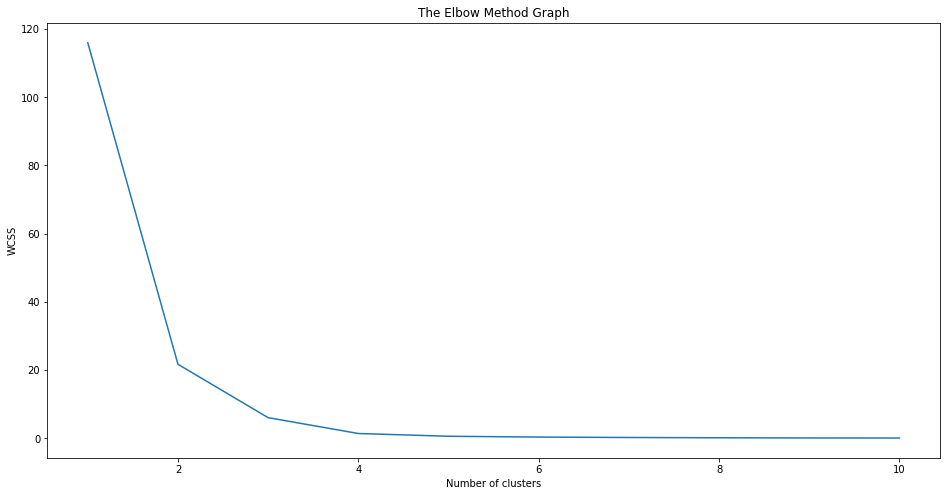

In [ ]:
# Using the elbow method to find out the optimal number of clusters. 
wcss=[]

# Loop ten times to:
#  - fit the k-means algorithm to data 
#  - use kmean++ random initialization method 
#  - allow for a maximum of 300 iterations to find final clusters 
#  - run the algorithm for 10 different initial centroids 
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10, random_state=0)
    kmeans.fit(X)

    # Compute the WCSS (within cluster sum of squares) and append it to a WCSS list.
    wcss.append(kmeans.inertia_)

# Plot the elbow graph using the WCSS list.
fig= plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

***Three (3) clusters seems to be the optimum number of clusters because that is where the elbow curves***

### Run Optimal K-Means

Create and fit the optimal K-Means cluster model

In [ ]:
kmeans = KMeans(n_clusters=3, init ='k-means++', max_iter=300, n_init=10, random_state=0 )
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
# The number of iterations required to converge
kmeans.n_iter_

2

Fit and predict the cluster labels

In [ ]:
labels = kmeans.fit_predict(X)
Counter(labels)

Counter({0: 55, 1: 1, 2: 2})

In [ ]:
X['Label'] = labels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Look at centroids

In [ ]:
kmeans.cluster_centers_

array([[-0.16789232, -0.20279004],
       [ 7.21635383,  6.3722722 ],
       [ 1.00886193,  2.3905901 ]])

In [ ]:
X[X.Label==2][['Pop_Sq_Mile','Cases_Sq_Mile']]

,Pop_Sq_Mile,Cases_Sq_Mile
202,0.701150,2.229285
213,1.316574,2.551895


### Scatter Plot Cluster Results

#### Plot scaled data cluster 

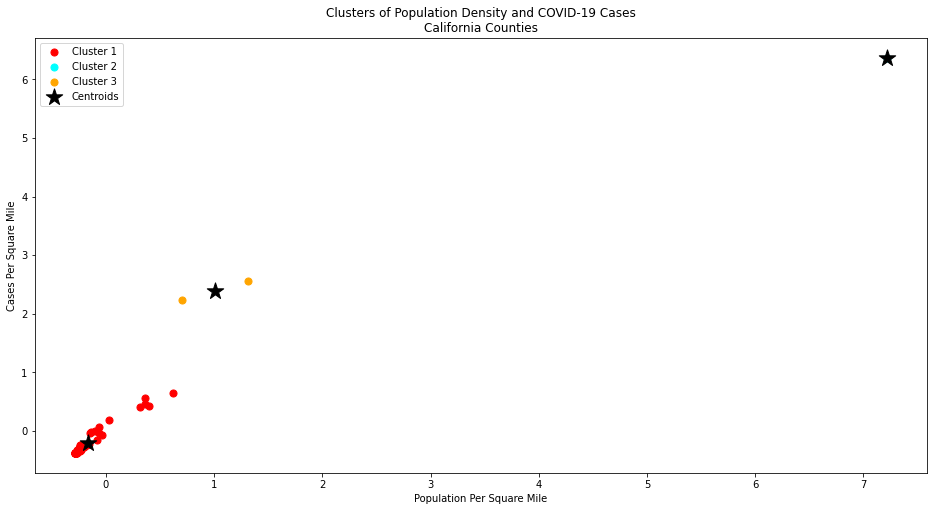

In [ ]:
fig= plt.figure(figsize=(16,8))
plt.scatter(X[X.Label==0]['Pop_Sq_Mile'], X[X.Label==0]['Cases_Sq_Mile'], s=50, c='red', label ='Cluster 1')
plt.scatter(X[X.Label==1]['Pop_Sq_Mile'], X[X.Label==1]['Cases_Sq_Mile'], s=50, c='cyan', label ='Cluster 2')
plt.scatter(X[X.Label==2]['Pop_Sq_Mile'], X[X.Label==2]['Cases_Sq_Mile'], s=50, c='orange', label ='Cluster 3')
#plt.scatter(X[X.Label==3]['Pop_Sq_Mile'], X[X.Label==3]['Cases_Sq_Mile'], s=50, c='blue', label ='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', label = 'Centroids', marker='*')
#plt.xlim(0,4000)
#plt.ylim(0,350)
plt.title('Clusters of Population Density and COVID-19 Cases\nCalifornia Counties')
plt.xlabel('Population Per Square Mile')
plt.ylabel('Cases Per Square Mile')
plt.legend(loc='upper left')
plt.show()

In [ ]:
ca_df['Label'] = labels
ca_df[['County','Pop_Sq_Mile','Cases_Sq_Mile','Label']].head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,County,Pop_Sq_Mile,Cases_Sq_Mile,Label
184,Alameda County,2261,121,0
185,Alpine County,1,0,0
186,Amador County,66,6,0


#### Plot clusters on original data scale

Scale back the centroids to original data representation


In [ ]:
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroids

array([[  294.12727273,    20.52727273],
       [18808.        ,   795.        ],
       [ 3244.5       ,   326.        ]])

In [ ]:
X1 = ca_df

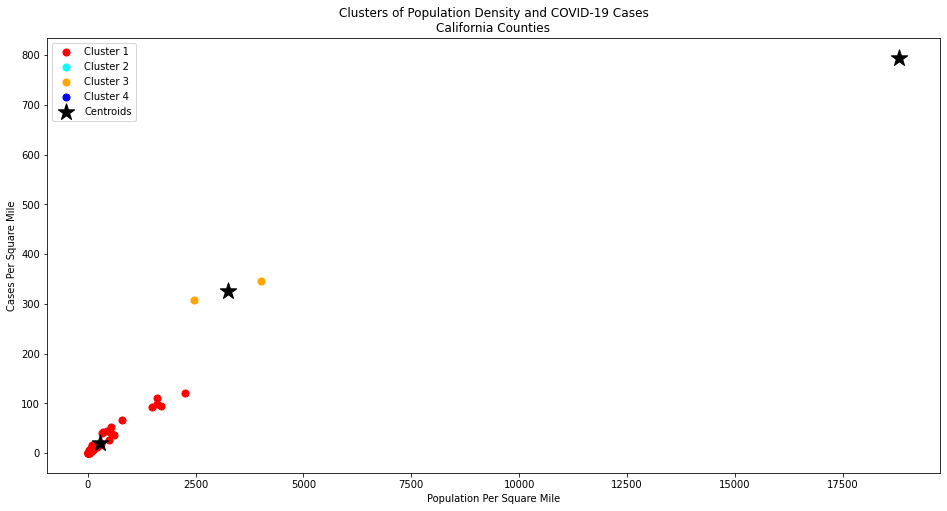

In [ ]:
fig= plt.figure(figsize=(16,8))
plt.scatter(X1[X1.Label==0]['Pop_Sq_Mile'], X1[X1.Label==0]['Cases_Sq_Mile'], s=50, c='red', label ='Cluster 1')
plt.scatter(X1[X1.Label==1]['Pop_Sq_Mile'], X1[X1.Label==1]['Cases_Sq_Mile'], s=50, c='cyan', label ='Cluster 2')
plt.scatter(X1[X1.Label==2]['Pop_Sq_Mile'], X1[X1.Label==2]['Cases_Sq_Mile'], s=50, c='orange', label ='Cluster 3')
plt.scatter(X1[X1.Label==3]['Pop_Sq_Mile'], X1[X1.Label==3]['Cases_Sq_Mile'], s=50, c='blue', label ='Cluster 4')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='black', label = 'Centroids', marker='*')
plt.title('Clusters of Population Density and COVID-19 Cases\nCalifornia Counties')
plt.xlabel('Population Per Square Mile')
plt.ylabel('Cases Per Square Mile')
plt.legend(loc='upper left')
plt.show()

---------

## California and Florida

Perform combined data clustering since there were different optimum K values for separated Florida and California data.  

### Filter State/County Data

In [67]:
cafl_df = df[(df['State'] == 'California') | (df['State'] == 'Florida')]
cafl_df.shape

(125, 17)

Reference: https://www.thiscodeworks.com/use-sklearn-standardscaler-only-on-certain-feature-columns-python/605cc55c3c8db10014203c0e

### Scale Feature Data

In [68]:
scaled_features = cafl_df.copy()
 
col_names = ['Pop_Sq_Mile','Cases_Sq_Mile']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
 
scaled_features[col_names] = features
scaled_features[['Pop_Sq_Mile','Cases_Sq_Mile']][:10] # Show 10

,Pop_Sq_Mile,Cases_Sq_Mile
184,0.975903,0.878615
185,-0.303609,-0.447770
186,-0.266809,-0.381999
187,-0.228876,-0.371037
188,-0.278698,-0.425847
189,-0.293984,-0.436808
190,0.607902,0.626493
191,-0.288889,-0.436808
192,-0.240766,-0.381999
193,-0.209627,-0.261419


### Determine Optimal Clusters (Elbow Method)

In [88]:
X = scaled_features[['Pop_Sq_Mile','Cases_Sq_Mile']]

Reference: https://medium.com/pursuitnotes/k-means-clustering-model-in-6-steps-with-python-35b532cfa8ad

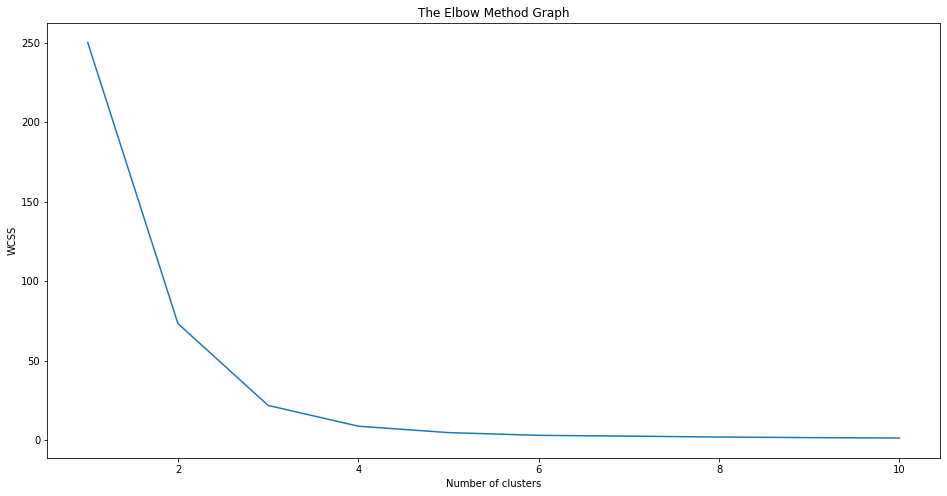

In [89]:
# Using the elbow method to find out the optimal number of clusters. 
wcss=[]

# Loop ten times to:
#  - fit the k-means algorithm to data 
#  - use kmean++ random initialization method 
#  - allow for a maximum of 300 iterations to find final clusters 
#  - run the algorithm for 10 different initial centroids 
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10, random_state=0)
    kmeans.fit(X)

    # Compute the WCSS (within cluster sum of squares) and append it to a WCSS list.
    wcss.append(kmeans.inertia_)

# Plot the elbow graph using the WCSS list.
fig= plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

***Four (4) clusters seems to be the optimum number of clusters because that is where the elbow curves***

### Run Optimal K-Means

Create and fit the optimal K-Means cluster model

In [90]:
kmeans = KMeans(n_clusters=4, init ='k-means++', max_iter=300, n_init=10, random_state=0 )
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [91]:
# The number of iterations required to converge
kmeans.n_iter_

4

Fit and predict the cluster labels

In [92]:
labels = kmeans.fit_predict(X)
Counter(labels)

Counter({0: 108, 1: 1, 2: 12, 3: 4})

In [93]:
X['Label'] = labels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Look at centroids

In [94]:
kmeans.cluster_centers_

array([[-0.20422233, -0.28050032],
       [10.34407864,  8.26691245],
       [ 0.53576395,  0.87222099],
       [ 1.32069144,  2.89011764]])

In [95]:
X[X.Label==2][['Pop_Sq_Mile','Cases_Sq_Mile']]

,Pop_Sq_Mile,Cases_Sq_Mile
184,0.975903,0.878615
190,0.607902,0.626493
217,0.606203,0.768997
224,0.663385,0.593607
226,0.541661,0.571683
322,0.609600,1.788450
331,0.406916,1.021120
344,0.512221,1.108815
351,0.251790,0.593607
364,0.568837,1.306128


### Scatter Plot Cluster Results

#### Plot scaled data cluster 

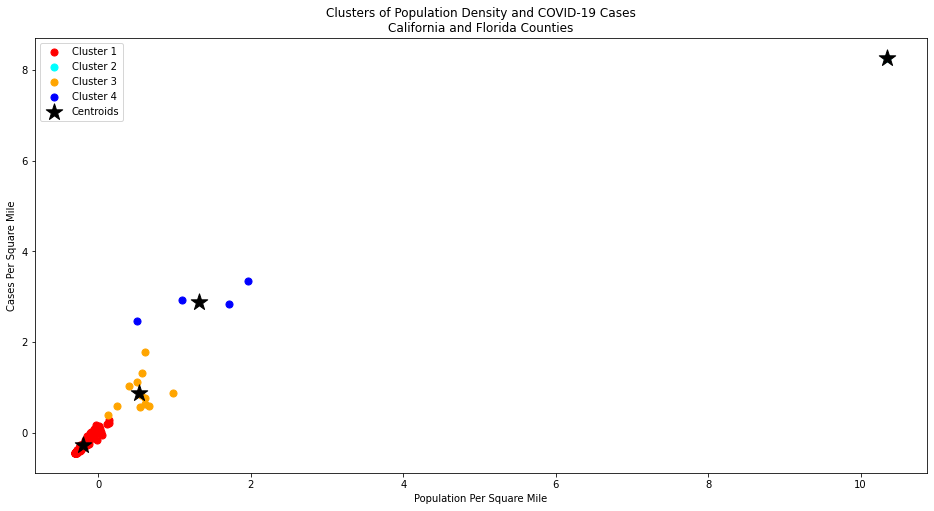

In [96]:
fig= plt.figure(figsize=(16,8))
plt.scatter(X[X.Label==0]['Pop_Sq_Mile'], X[X.Label==0]['Cases_Sq_Mile'], s=50, c='red', label ='Cluster 1')
plt.scatter(X[X.Label==1]['Pop_Sq_Mile'], X[X.Label==1]['Cases_Sq_Mile'], s=50, c='cyan', label ='Cluster 2')
plt.scatter(X[X.Label==2]['Pop_Sq_Mile'], X[X.Label==2]['Cases_Sq_Mile'], s=50, c='orange', label ='Cluster 3')
plt.scatter(X[X.Label==3]['Pop_Sq_Mile'], X[X.Label==3]['Cases_Sq_Mile'], s=50, c='blue', label ='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', label = 'Centroids', marker='*')
plt.title('Clusters of Population Density and COVID-19 Cases\nCalifornia and Florida Counties')
plt.xlabel('Population Per Square Mile')
plt.ylabel('Cases Per Square Mile')
plt.legend(loc='upper left')
plt.show()

In [97]:
cafl_df['Label'] = labels
cafl_df[['County','Pop_Sq_Mile','Cases_Sq_Mile','Label']].head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,County,Pop_Sq_Mile,Cases_Sq_Mile,Label
184,Alameda County,2261,121,2
185,Alpine County,1,0,0
186,Amador County,66,6,0


#### Plot clusters on original data scale

Scale back the centroids to original data representation


In [177]:
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroids

array([[1.76546296e+02, 1.52592593e+01],
       [1.88080000e+04, 7.95000000e+02],
       [1.48358333e+03, 1.20416667e+02],
       [2.87000000e+03, 3.04500000e+02]])

In [99]:
X1 = cafl_df

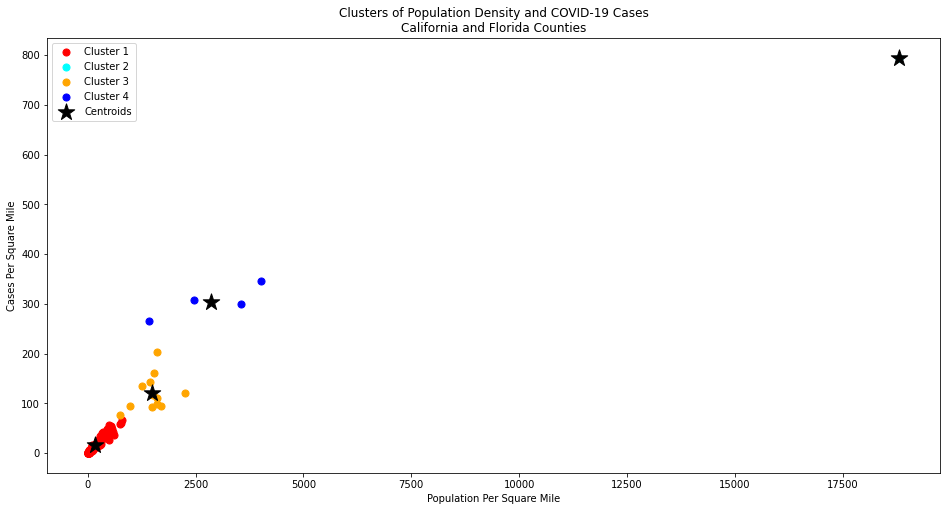

In [100]:
fig= plt.figure(figsize=(16,8))
plt.scatter(X1[X1.Label==0]['Pop_Sq_Mile'], X1[X1.Label==0]['Cases_Sq_Mile'], s=50, c='red', label ='Cluster 1')
plt.scatter(X1[X1.Label==1]['Pop_Sq_Mile'], X1[X1.Label==1]['Cases_Sq_Mile'], s=50, c='cyan', label ='Cluster 2')
plt.scatter(X1[X1.Label==2]['Pop_Sq_Mile'], X1[X1.Label==2]['Cases_Sq_Mile'], s=50, c='orange', label ='Cluster 3')
plt.scatter(X1[X1.Label==3]['Pop_Sq_Mile'], X1[X1.Label==3]['Cases_Sq_Mile'], s=50, c='blue', label ='Cluster 4')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='black', label = 'Centroids', marker='*')
plt.title('Clusters of Population Density and COVID-19 Cases\nCalifornia and Florida Counties')
plt.xlabel('Population Per Square Mile')
plt.ylabel('Cases Per Square Mile')
plt.legend(loc='upper left')
plt.show()

In [178]:
# Remove outlier cluster centroid since it only has San Francisco in its cluster
centroids_list = list(centroids)
centroids_list.pop(1)  # Remove Cluster 2 at index 1
centroids = np.array(centroids_list)
centroids

array([[ 176.5462963 ,   15.25925926],
       [1483.58333333,  120.41666667],
       [2870.        ,  304.5       ]])

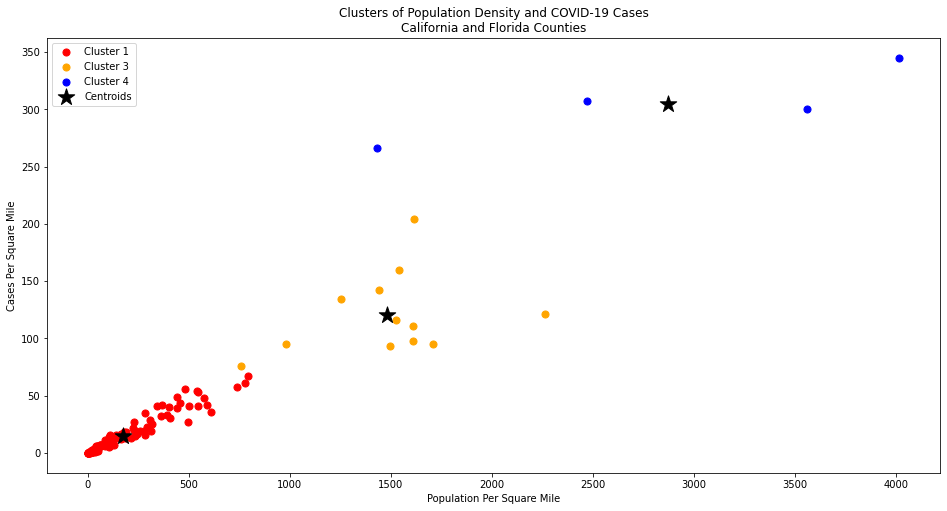

In [179]:
fig= plt.figure(figsize=(16,8))
plt.scatter(X1[X1.Label==0]['Pop_Sq_Mile'], X1[X1.Label==0]['Cases_Sq_Mile'], s=50, c='red', label ='Cluster 1')
#plt.scatter(X1[X1.Label==1]['Pop_Sq_Mile'], X1[X1.Label==1]['Cases_Sq_Mile'], s=50, c='cyan', label ='Cluster 2')
plt.scatter(X1[X1.Label==2]['Pop_Sq_Mile'], X1[X1.Label==2]['Cases_Sq_Mile'], s=50, c='orange', label ='Cluster 3')
plt.scatter(X1[X1.Label==3]['Pop_Sq_Mile'], X1[X1.Label==3]['Cases_Sq_Mile'], s=50, c='blue', label ='Cluster 4')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='black', label = 'Centroids', marker='*')
plt.title('Clusters of Population Density and COVID-19 Cases\nCalifornia and Florida Counties')
plt.xlabel('Population Per Square Mile')
plt.ylabel('Cases Per Square Mile')
plt.legend(loc='upper left')
plt.show()